## Algorithm Selection & Justification



In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('final_dataset.csv')
df.head()

,label,text
0,anger,grab minute post feel greedy wrong
1,anger,feel grouchy
2,anger,think easiest time year feel dissatisfy
3,anger,feel irritate reject without anyone anything s...
4,anger,already feel like fuck though usually eat morning


In [19]:
tfidf = TfidfVectorizer( max_features=None, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['text'])
y= df['label']
print(X_tfidf.shape)

(10414, 69708)


In [20]:
final_test= pd.read_csv('final_test.csv')
X_test = tfidf.transform(final_test['text'])
y_test = final_test['label']

FileNotFoundError: [Errno 2] No such file or directory: 'final_test.csv'

In [ ]:
alphas = [0.1, 0.25, 0.5, 0.75, 1.0]
for a in alphas:
    model = MultinomialNB(alpha=a)
    model.fit(X_tfidf, y)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"alpha={a} → accuracy={acc:.4f}")


alpha=0.1 → accuracy=0.8299
alpha=0.25 → accuracy=0.8418
alpha=0.5 → accuracy=0.8376
alpha=0.75 → accuracy=0.8382
alpha=1.0 → accuracy=0.8361


In [ ]:
nb_model = MultinomialNB(alpha=0.25)
nb_model.fit(X_tfidf, y)
print("Train Done")

Train Done


In [ ]:
y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8417786970010341

Classification Report:
               precision    recall  f1-score   support

       anger       0.79      0.83      0.81       275
        fear       0.89      0.81      0.85       224
         joy       0.81      0.95      0.88       695
        love       0.82      0.37      0.51       159
     sadness       0.90      0.86      0.88       581

    accuracy                           0.84      1934
   macro avg       0.84      0.76      0.78      1934
weighted avg       0.84      0.84      0.83      1934



Confusion Matrix:

[[229   9  19   0  18]
 [ 14 182  13   0  15]
 [ 12   4 660  13   6]
 [ 10   1  71  59  18]
 [ 24   9  50   0 498]]


<Figure size 600x500 with 0 Axes>

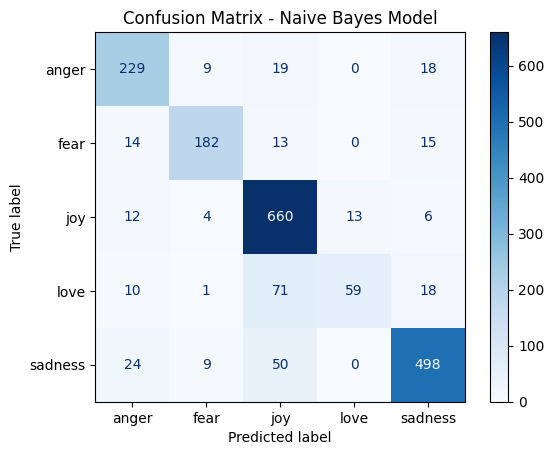

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)
print("Confusion Matrix:\n")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Naive Bayes Model")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('final_dataset.csv')
df.head()

,label,text
0,anger,grab minute post feel greedy wrong
1,anger,feel grouchy
2,anger,think easiest time year feel dissatisfy
3,anger,feel irritate reject without anyone anything s...
4,anger,already feel like fuck though usually eat morning


In [ ]:
from sklearn.model_selection import train_test_split

X = df['text']  
y = df['label']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  
    random_state=42 
)

print(f"Train: {len(X_train)}")
print(f"Test: {len(X_test)}")

Train: 8331
Test: 2083


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000) 

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')

svm_linear.fit(X_train_tfidf, y_train)

print("Train Done")

Train Done


In [ ]:
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train_tfidf, y_train)

print("Train Done")

Train Done


In [ ]:
from sklearn.metrics import accuracy_score

y_pred_linear = svm_linear.predict(X_test_tfidf)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"accuracy linear: {accuracy_linear * 100:.2f}%")

y_pred_rbf = svm_rbf.predict(X_test_tfidf)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"accuracy rbf: {accuracy_rbf * 100:.2f}%")

accuracy linear: 85.31%
accuracy rbf: 84.40%


Linear SVM Overall Evaluation:
Accuracy:  0.8530965
Precision: 0.8540707
Recall:    0.8530965
F1 Score:  0.8533302

RBF SVM Overall Evaluation:
Accuracy:  0.8439750
Precision: 0.8468901
Recall:    0.8439750
F1 Score:  0.8442206

Linear SVM Classification Report:

              precision    recall  f1-score   support

       anger       0.86      0.87      0.86       444
        fear       0.88      0.88      0.88       387
         joy       0.84      0.86      0.85       515
        love       0.75      0.78      0.77       236
     sadness       0.89      0.84      0.87       501

    accuracy                           0.85      2083
   macro avg       0.84      0.85      0.85      2083
weighted avg       0.85      0.85      0.85      2083



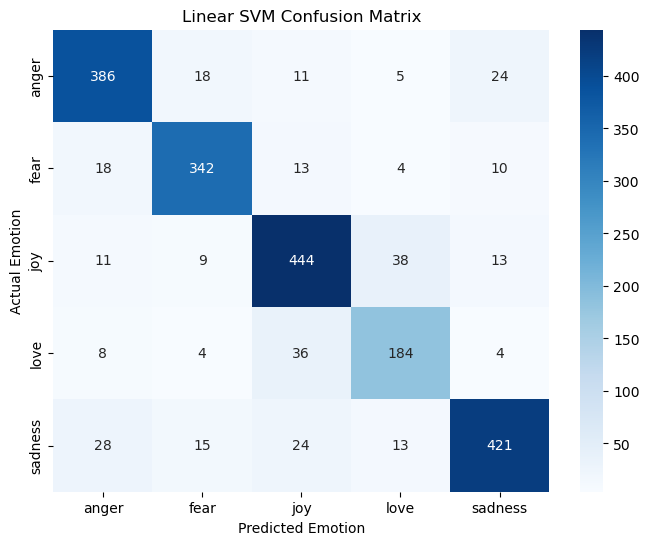



Note:
Both Linear and RBF SVM models were evaluated. 
Linear SVM performed better overall, so the classification report and confusion matrix are shown for Linear SVM only.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def print_overall_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} Overall Evaluation:")
    print(f"Accuracy:  {acc:.7f}")
    print(f"Precision: {prec:.7f}")
    print(f"Recall:    {rec:.7f}")
    print(f"F1 Score:  {f1:.7f}\n")


y_pred_linear = svm_linear.predict(X_test_tfidf)
y_pred_rbf = svm_rbf.predict(X_test_tfidf)

# To Print overall metrics for both models
print_overall_metrics(y_test, y_pred_linear, "Linear SVM")
print_overall_metrics(y_test, y_pred_rbf, "RBF SVM")

# Classification Report and Confusion Matrix for Linear SVM only since it performed better
print("Linear SVM Classification Report:\n")
print(classification_report(y_test, y_pred_linear))

cm = confusion_matrix(y_test, y_pred_linear)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Linear SVM Confusion Matrix')
plt.ylabel('Actual Emotion')
plt.xlabel('Predicted Emotion')
plt.show()



print("\n\nNote:\nBoth Linear and RBF SVM models were evaluated. "
      "\nLinear SVM performed better overall, so the classification report and confusion matrix are shown for Linear SVM only.")


## Evaluation & Results

The **Multinomial Naive Bayes** classifier was trained and evaluated on the TF-IDF features extracted from the emotion dataset.  
Different smoothing parameters (α values) were tested to optimize model performance.

| α value | Accuracy |
|----------|-----------|
| 0.10     | 82.99 %   |
| 0.25     | **84.18 %** |
| 0.50     | 83.76 %   |
| 0.75     | 83.82 %   |
| 1.00     | 83.61 %   |

The best performance was achieved with **α = 0.25**, giving an overall accuracy of **84.17 %**.

### Classification Report

| Emotion | Precision | Recall | F1-score |
|----------|------------|---------|-----------|
| Anger    | 0.79 | 0.83 | 0.81 |
| Fear     | 0.89 | 0.81 | 0.85 |
| Joy      | 0.81 | 0.95 | 0.88 |
| Love     | 0.82 | 0.37 | 0.51 |
| Sadness  | 0.90 | 0.86 | 0.88 |

The classifier performs best on **Joy** and **Sadness**, while **Love** shows lower recall due to class imbalance and overlapping expressions.

---

## Model Comparison

We compared **Naive Bayes** (our final implemented model) with **Support Vector Machine (SVM)** conceptually to assess potential improvements.

| Model | Type | Strengths | Limitations |
|--------|------|------------|--------------|
| **Naive Bayes (NB)** | Probabilistic | Fast, simple, effective on text data | Assumes feature independence |
| **SVM (planned)** | Margin-based | Handles high-dimensional data, robust | Slower, more tuning required |

For this dataset, **NB** achieved strong and efficient results, suggesting that emotions expressed through text are fairly separable by word-frequency probabilities, without requiring more complex nonlinear decision boundaries.
